In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Create sample data
data = np.array([
    [25, 15000],  # Age, Annual Income
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform hierarchical clustering
hierarchical_cluster = AgglomerativeClustering(
    n_clusters=3, 
    linkage='ward'
)
cluster_labels = hierarchical_cluster.fit_predict(data_scaled)

print("Cluster Labels:", cluster_labels)
# Output: [0 0 0 1 1 2 2 2]

Cluster Labels: [2 2 2 1 1 0 0 0]


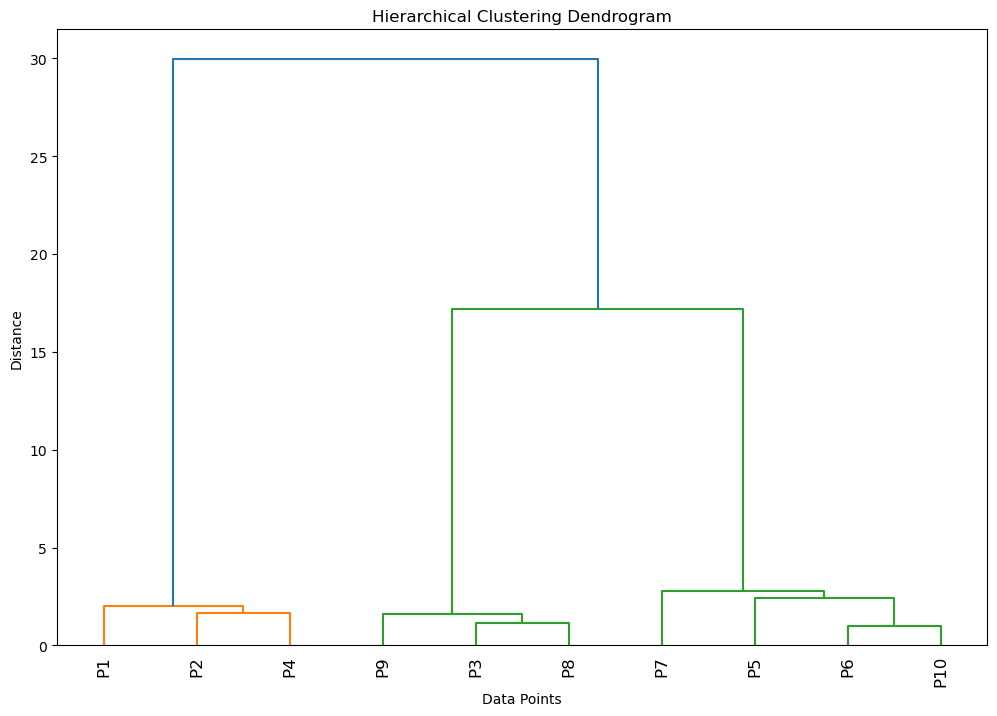

Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

# Create linkage matrix
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'],
    leaf_rotation=90,
    leaf_font_size=12
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Find optimal number of clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
print("Cluster assignments:", clusters)

Dataset shape: (93, 3)
         Age        Income  SpendingScore
0  47.450712  21692.585159      58.944684
1  37.926035  41587.093545      64.019613
2  49.715328  43145.709669      77.076281
3  62.845448  33954.454616      76.345051
4  36.487699  46774.285767      15.558266


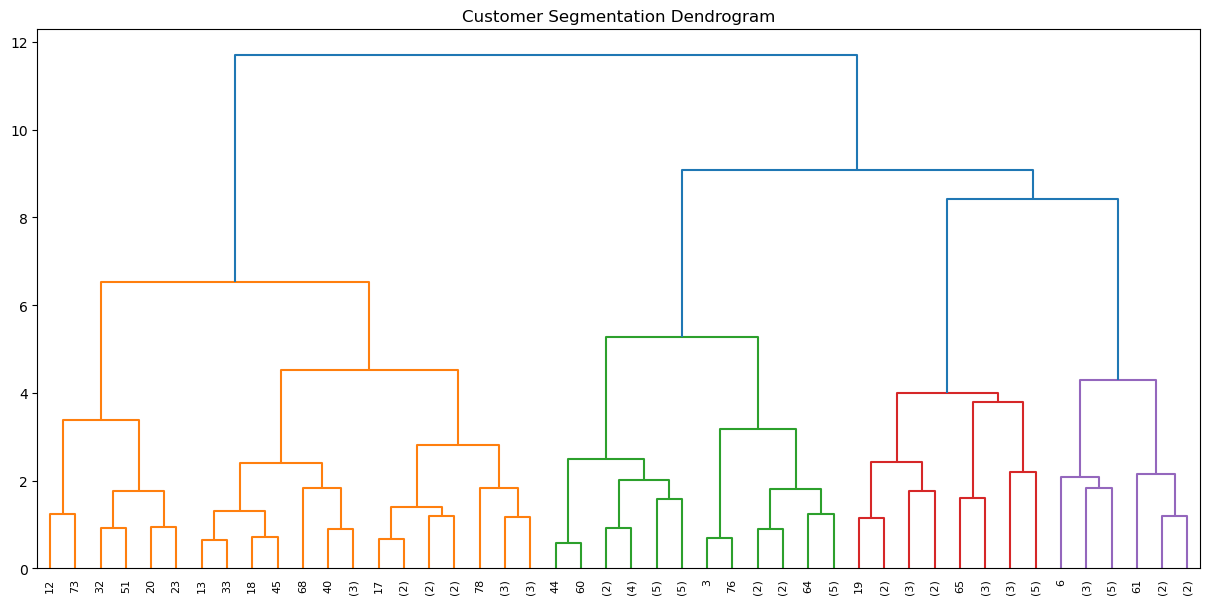

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Create sample customer data
np.random.seed(42)
n_customers = 100

data = pd.DataFrame({
    'Age': np.random.normal(40, 15, n_customers),
    'Income': np.random.normal(50000, 20000, n_customers),
    'SpendingScore': np.random.normal(50, 25, n_customers)
})

# Clean data
data = data[(data['Age'] > 0) & (data['Income'] > 0) & 
            (data['SpendingScore'] >= 0) & (data['SpendingScore'] <= 100)]

print("Dataset shape:", data.shape)
print(data.head())

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform hierarchical clustering
linkage_matrix = linkage(data_scaled, method='ward')

# Plot dendrogram to choose optimal clusters
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Customer Segmentation Dendrogram')
plt.show()